In [2]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s


#consumer key, consumer secret, access token, access secret.
consumer_key ="Consumer_Key"
consumer_secret="Consumer_Secret"
access_token="Access_Token"
access_token_secret="Access_Token_Secret"

class listen_data(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)
        try:
            tweet = all_data['text']
            sentiment, confidence = s.sentiment(tweet.lower())
            print(tweet, sentiment, confidence)
            if confidence*100 >= 75:
                output_file = open('Tweet_Sentiments.txt','a')
                output_file.write(sentiment)
                output_file.write('\n')
                output_file.close()
            return True
        except:
            return True
    def on_error(self, status):
        print(status)

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

twitter_data_stream = Stream(auth,listen_data())
twitter_data_stream.filter(track=['Logan'])


10664
RT @MauricioRicardo: "Logan" é um filme lindo. Hugh Jackman tá tão bem que a gente chora e esquece que tá vendo Marvel. pos 1.0
Co-Work &amp; Co-Play in Logan Circle’s LoganExchange @purpleclaire https://t.co/YP3yuYDRbA #workspace #workspace #Futureofwork #business neg 1.0
The part of North Dakota Logan is in is very different from the ND I've been to. That, or a decade of fracking really took a toll. pos 1.0
RT @APOllieEeleo: Logan and Laura https://t.co/9Va0poqExN neg 1.0
RT @staypluggd: Get all the details about Hugh Jackman's #Logan movie https://t.co/QEPf9AjTW2 neg 1.0
@cameronMstewart Logan's secretly a lady. neg 1.0
RT @Acadius: Saw #Logan
Once in a great while comes a movie that leaves its mark on you long after you leave the theater. 
A must see. @Wol… pos 1.0
HUUUUUUUY HAHAHAHAHHAAHAHAHAHA UNEXPECT THE UNEXPECTED! WAHAHAHAHAHHA https://t.co/3UJBFkFKaF pos 1.0
RT @Paco_Gertte: Mientras todos viendo Logan, tu y yo así... https://t.co/QFErjROepU pos 1.0
#LoganWolverine ya 

KeyboardInterrupt: 

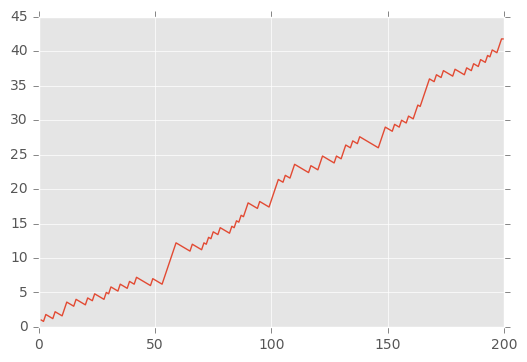

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(object):
    tweetData = open('Tweet_Sentiments.txt','r').read()
    lines = tweetData.split('\n')
    xarr = []
    yarr = []
    x = 0
    y = 0
    for l in lines[-200:]:
        x += 1
        if 'pos' in l:
            y += 1
        elif 'neg' in l:
            y -= 0.2
        xarr.append(x)
        yarr.append(y)
    ax1.clear()
    ax1.plot(xarr, yarr)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()